In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Global Behavior of Newton in 1D

In [2]:
def func(x):
    return x*(x-1)*(x+1)

In [3]:
def dfunc(x):
    return 3*x**2-1

In [4]:
def newton(f,df,minDist,maxDist,N,roots,Ia,Ie,ran):
    """
    f ... Funktion
    df ... Ableitung von f
    mi,ma ... Abbruchkriterien
    N ... maximal Anzahl der Iterationen
    roots ... Nullstellen der Funktion in einem numpy-array
    Ia,Ie ... Intervallbegrenzungen
    ran ... Schrittweite innerhalb des Intervalls
    """

    final_Index = np.zeros(N)
    val = np.linspace(Ia, Ie, N)

    for i in range(N):
        x = val[i]
        for j in range(N):
            xk = x - f(x)/df(x)
        
            minD = np.min(np.abs(xk - roots)) #näheste NST
            
            if minD < minDist: #Abbruchbedingung 1
                which = np.argmin(np.abs(xk - roots)) #Index der NST im array
                final_Index[i] = which + 1
                break
            elif minD > maxDist: #Abbruchbedingung 2
                if xk < 0:
                    final_Index[j] = 0
                else:
                    final_Index[j] = 4
                break
            
            x = xk
    
    return final_Index

In [5]:
finalIndex = newton(func,dfunc,1e-5,500,1000,np.array([1,0,-1]),-3,3,0.01)

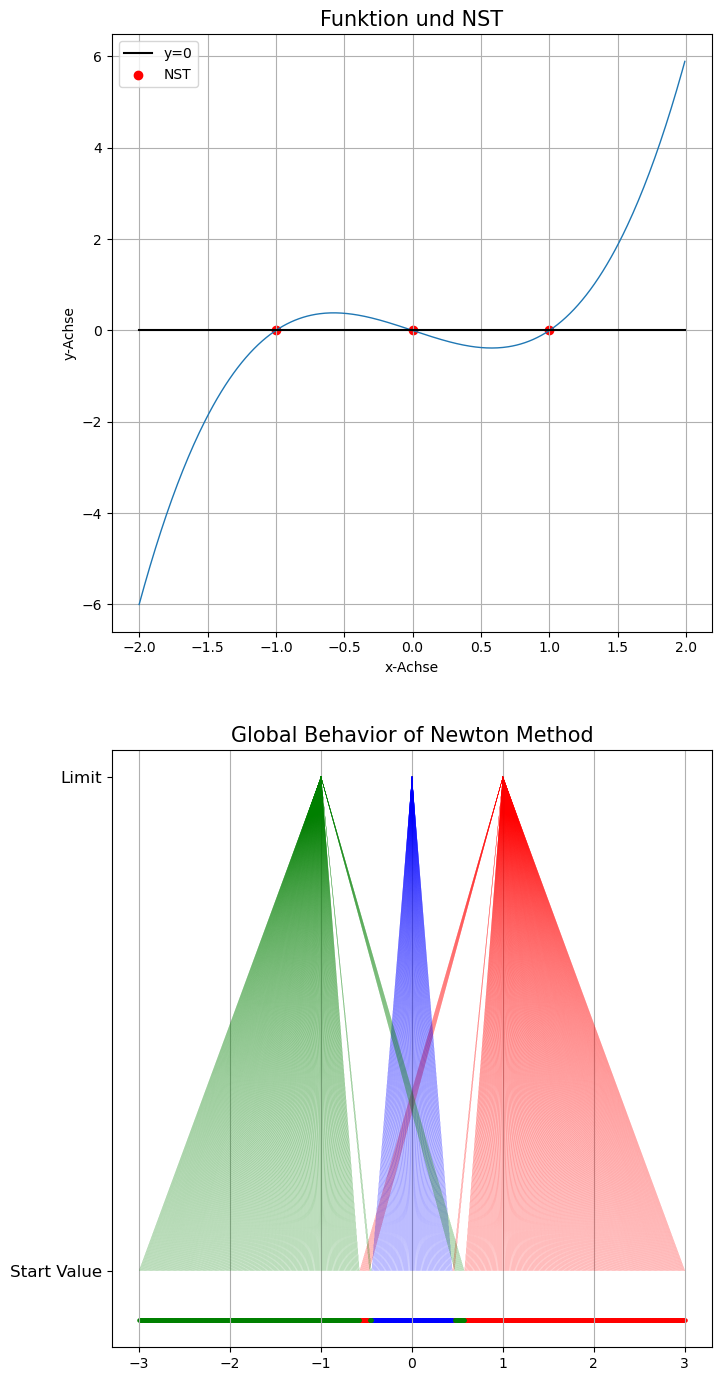

In [6]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(8,15))

#Figure 1

x_w = np.arange(-2,2,0.01)

ax1.set_title('Polynomfunktion')
ax1.grid('on')
ax1.set_xlabel('x-Achse')
ax1.set_ylabel('y-Achse')

ax1.plot(x_w,func(x_w),linewidth = 1)#,label = 'Funktion')
ax1.plot(x_w, np.zeros_like(x_w),label = 'y=0',c = 'black')
ax1.scatter(np.array([-1,0,1]),np.array([0,0,0]),label='NST',c='red')
ax1.set_title('Funktion und NST',fontsize = 15)
ax1.legend()

fig.tight_layout(pad = 5)

#Figure 2

colorVals = ['k', 'r', 'b', 'g', 'm', 'k']
roots = np.array([1,0,-1])
rootsExtended = np.array([-3, *roots, 3])

x0Vals = np.linspace(-3, 3, 1000) #wenn man mehr Startwerte haben will, hier und in der oberen Zelle ändern

for i in range(len(roots)):
    which = finalIndex == i + 1
    rootsVal = rootsExtended[i + 1]
    
    X = np.vstack([x0Vals[which], rootsVal * np.ones(np.sum(which))])
    Y = np.vstack([np.zeros(np.sum(which)), 2 * np.ones(np.sum(which))])
    
    ax2.plot(X, Y, colorVals[i + 1], linewidth=0.1)
    ax2.scatter(x0Vals[which], -0.2 * np.ones(np.sum(which)), 5, colorVals[i + 1])

ax2.grid(axis='x')
ax2.set_yticks([0.0, 2.0], ['Start Value', 'Limit'], fontsize = 12)
ax2.set_title('Global Behavior of Newton Method', fontsize = 15);